### Hierarchical clustering
- agglomerative - bottom up, form closest datapoint into cluster, repeat until no more points
- divisive
- https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

### Read the dataset

In [6]:
df = pd.read_csv("Mall_Customers.csv")
print(len(df))
X = df.iloc[:, [3,4]].values
df.head()

200


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Create the dendrogram
- linkage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
- helps visualize the number of clusters

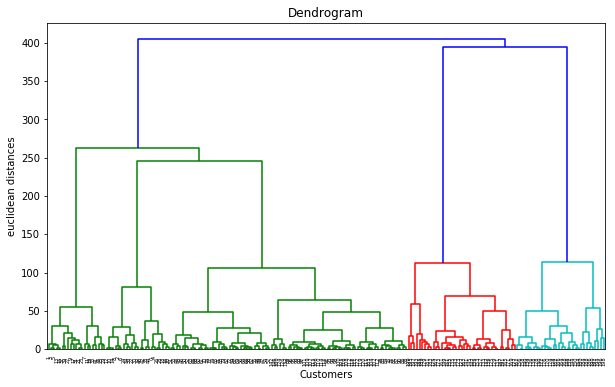

In [10]:
plt.figure(figsize=(10,6))
dendrogram = hc.dendrogram(hc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel("euclidean distances")
plt.show()

### fit to agglomerative cluster
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [12]:
clust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred = clust.fit_predict(X)

### Plot the clusters

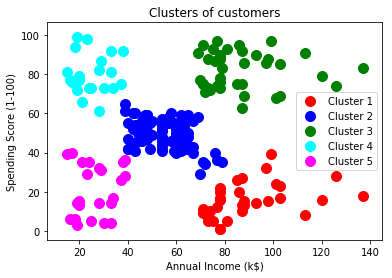

In [13]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()